**O MODELO DE REGRESSÃO FOI SELECIONADO POR SER ADEQUADO AO PROBLEMA DE PREVISÃO DO TEMPO DE DURAÇÃO DOS MANTIMENTOS NOS ABRIGOS EMERGENCIAIS. SEU OBJETIVO É APOIAR A GESTÃO DESSES ABRIGOS, PERMITINDO ESTIMAR DE FORMA ANTECIPADA POR QUANTO TEMPO OS RECURSOS DISPONÍVEIS SERÃO SUFICIENTES.**

IMPORTANDO BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

CARREGANDO DADOS

In [2]:
df = pd.read_csv('/content/sample_data/abrigos_com_tempo_duracao_balanceado.csv')

LEITURA DOS DADOS

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_abrigo          95 non-null     int64  
 1   capacidade_total   95 non-null     int64  
 2   vagas_disponiveis  95 non-null     int64  
 3   estoque_comida     95 non-null     int64  
 4   estoque_remedios   95 non-null     int64  
 5   estoque_agua       95 non-null     int64  
 6   tempo_duracao      95 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 5.3 KB
None


In [4]:
print(df.head())

   id_abrigo  capacidade_total  vagas_disponiveis  estoque_comida  \
0          1               100                 91             602   
1          2               100                 50             537   
2          3               100                 15             896   
3          4               100                 44             729   
4          5               100                 39             654   

   estoque_remedios  estoque_agua  tempo_duracao  
0               910           960          14.36  
1               454          1301          28.77  
2               536          1306          23.30  
3               546          1692          19.97  
4               615          1665           8.90  


 ANÁLISE EXPLORATÓRIA E CONFECÇÃO DOS GRAFICOS

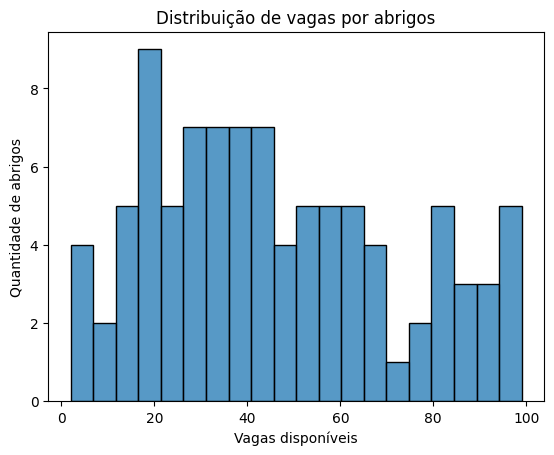

In [5]:
sns.histplot(df['vagas_disponiveis'], bins=20)
plt.title('Distribuição de vagas por abrigos')
plt.xlabel('Vagas disponíveis')
plt.ylabel('Quantidade de abrigos')
plt.show()

CADA BARRA DO GRAFICO REPRESENTA UM AGRUPAMENTO DE 20 ABRIGOS.

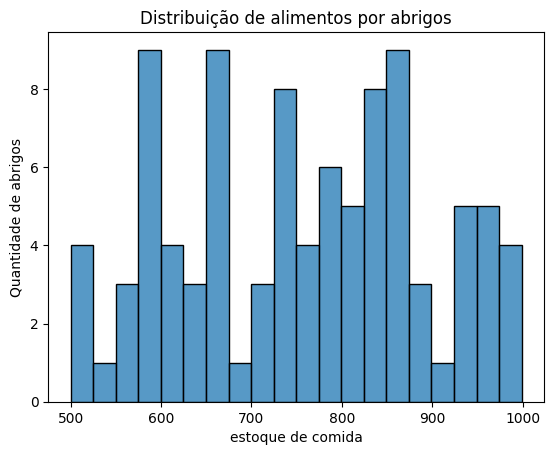

In [6]:
sns.histplot(df['estoque_comida'], bins=20)
plt.title('Distribuição de alimentos por abrigos')
plt.xlabel('estoque de comida')
plt.ylabel('Quantidade de abrigos')
plt.show()

CADA BARRA DO GRAFICO REPRESENTA UM AGRUPAMENTO DE 20 ABRIGOS.

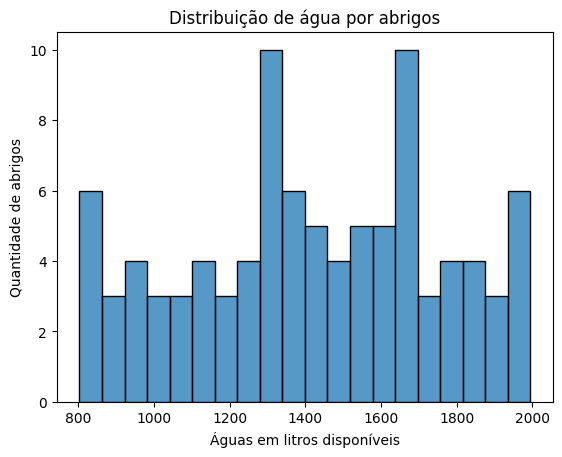

In [7]:
sns.histplot(df['estoque_agua'], bins=20)
plt.title('Distribuição de água por abrigos')
plt.xlabel('Águas em litros disponíveis')
plt.ylabel('Quantidade de abrigos')
plt.show()

CADA BARRA DO GRAFICO REPRESENTA UM AGRUPAMENTO DE 20 ABRIGOS.

SELEÇÃO DE FEATURES E TARGET

In [8]:
features = ['vagas_disponiveis', 'estoque_comida', 'estoque_remedios', 'estoque_agua']
target = 'tempo_duracao'

X = df[features]
y = df[target]


NORMALIZAÇÃO DOS DADOS

In [9]:
scaler_X = MinMaxScaler()
X_normalizado = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_normalizado = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

SEPARAÇÃO DOS DADOS PARA TREINO

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalizado, y_normalizado, test_size=0.3, random_state=42
)

In [11]:
modelo = Sequential()
modelo.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dense(1, activation='relu'))
modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TREINAMENTO DO MODELO

In [12]:
historico = modelo.fit(
    X_train, y_train,
    epochs=40,
    validation_split=0.2,
    verbose=2
)


Epoch 1/40
2/2 - 3s - 2s/step - loss: 0.2940 - mae: 0.4572 - val_loss: 0.2885 - val_mae: 0.4702
Epoch 2/40
2/2 - 0s - 192ms/step - loss: 0.2713 - mae: 0.4407 - val_loss: 0.2638 - val_mae: 0.4493
Epoch 3/40
2/2 - 0s - 50ms/step - loss: 0.2492 - mae: 0.4235 - val_loss: 0.2392 - val_mae: 0.4255
Epoch 4/40
2/2 - 0s - 48ms/step - loss: 0.2323 - mae: 0.4079 - val_loss: 0.2159 - val_mae: 0.4009
Epoch 5/40
2/2 - 0s - 46ms/step - loss: 0.2079 - mae: 0.3836 - val_loss: 0.1904 - val_mae: 0.3735
Epoch 6/40
2/2 - 0s - 54ms/step - loss: 0.1840 - mae: 0.3612 - val_loss: 0.1675 - val_mae: 0.3479
Epoch 7/40
2/2 - 0s - 48ms/step - loss: 0.1648 - mae: 0.3409 - val_loss: 0.1480 - val_mae: 0.3234
Epoch 8/40
2/2 - 0s - 70ms/step - loss: 0.1486 - mae: 0.3198 - val_loss: 0.1322 - val_mae: 0.3068
Epoch 9/40
2/2 - 0s - 66ms/step - loss: 0.1372 - mae: 0.3066 - val_loss: 0.1199 - val_mae: 0.2940
Epoch 10/40
2/2 - 0s - 46ms/step - loss: 0.1298 - mae: 0.2978 - val_loss: 0.1110 - val_mae: 0.2861
Epoch 11/40
2/2 - 0s

CALCULO DAS METRICAS DE AVALIAÇÃO

In [13]:
y_pred = modelo.predict(X_test).flatten()
y_pred_desnormalizado = scaler_y.inverse_transform(y_pred.reshape(-1,1)).flatten()
y_test_desnormalizado = scaler_y.inverse_transform(y_test.reshape(-1,1)).flatten()


y_pred_desnormalizado = np.maximum(y_pred_desnormalizado, 0)

mse = mean_squared_error(y_test_desnormalizado, y_pred_desnormalizado)
mae = mean_absolute_error(y_test_desnormalizado, y_pred_desnormalizado)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_desnormalizado, y_pred_desnormalizado)

print("\nAvaliação do Modelo:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

Avaliação do Modelo:
MAE:  6.41
MSE:  52.96
RMSE: 7.28
R²:   0.03


PREDIÇÃO DOS ABRIGOS

In [14]:
X_abrigo_normalizado = scaler_X.transform(X)


preds_normalizado = modelo.predict(X_abrigo_normalizado)


preds_dias = scaler_y.inverse_transform(preds_normalizado).flatten()


preds_dias = np.maximum(preds_dias, 0)


resultado = pd.DataFrame({
    'id_abrigo': df['id_abrigo'],
    'tempo_duracao_previsto_dias': preds_dias
})


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


ORGANIZAÇÃO E EXIBIÇÃO DOS RESULTADOS OBTIDOS

In [15]:
print("\nPredição de tempo de duração dos mantimentos (em dias) por abrigo:")
for index, row in resultado.iterrows():
    print(f"[{row['id_abrigo']}] -> [{row['tempo_duracao_previsto_dias']:.2f}]")


Predição de tempo de duração dos mantimentos (em dias) por abrigo:
[1.0] -> [16.40]
[2.0] -> [16.48]
[3.0] -> [14.67]
[4.0] -> [18.30]
[5.0] -> [18.63]
[6.0] -> [18.55]
[7.0] -> [19.78]
[8.0] -> [20.72]
[9.0] -> [18.22]
[10.0] -> [17.03]
[11.0] -> [14.31]
[12.0] -> [21.54]
[13.0] -> [17.93]
[14.0] -> [13.03]
[16.0] -> [12.73]
[17.0] -> [17.68]
[18.0] -> [17.67]
[19.0] -> [13.22]
[20.0] -> [16.35]
[21.0] -> [16.43]
[22.0] -> [16.88]
[23.0] -> [17.54]
[24.0] -> [13.04]
[25.0] -> [17.18]
[26.0] -> [17.39]
[27.0] -> [20.82]
[28.0] -> [21.11]
[29.0] -> [16.57]
[30.0] -> [17.04]
[31.0] -> [15.07]
[32.0] -> [16.70]
[33.0] -> [19.72]
[35.0] -> [18.49]
[36.0] -> [17.11]
[37.0] -> [18.27]
[38.0] -> [18.22]
[39.0] -> [14.78]
[40.0] -> [17.39]
[41.0] -> [15.76]
[42.0] -> [20.71]
[43.0] -> [17.66]
[44.0] -> [19.37]
[45.0] -> [14.19]
[46.0] -> [15.13]
[47.0] -> [14.55]
[48.0] -> [18.53]
[50.0] -> [18.81]
[51.0] -> [19.52]
[52.0] -> [19.31]
[53.0] -> [17.02]
[54.0] -> [19.09]
[55.0] -> [16.32]
[56.0